In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('Data_laatste_maand.csv')

In [3]:
dataset.drop(columns=['Unnamed: 0'], inplace=True)
dataset.dropna(inplace=True)
dataset

,Datum,NettoVerbruikBerekend_30,Temp_last_month,Wind_last_month,Zon_last_month,Infl_last_month
1,2000-02,8235,4.329032,3.980645,1.806452,52.22
2,2000-03,8738,5.855172,4.296552,3.682759,52.29
3,2000-04,7912,6.796774,3.677419,2.583871,52.73
4,2000-05,8221,9.986667,2.840000,5.116667,52.74
5,2000-06,7822,14.732258,2.900000,6.780645,52.74
...,...,...,...,...,...,...
259,2021-08,8981,17.987097,2.416129,6.264516,115.79
260,2021-09,9030,16.935484,2.677419,5.325806,117.17
261,2021-10,9410,15.930000,2.160000,5.940000,123.29
262,2021-11,9678,11.612903,3.045161,3.945161,136.56


In [4]:
dataset.dtypes

Datum                        object
NettoVerbruikBerekend_30      int64
Temp_last_month             float64
Wind_last_month             float64
Zon_last_month              float64
Infl_last_month             float64
dtype: object

In [5]:
x = dataset.drop(['Datum', 'NettoVerbruikBerekend_30'], axis=1).values 
y = dataset['NettoVerbruikBerekend_30'].values

In [6]:
y.shape

(263,)

In [7]:
x.shape

(263, 4)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [9]:
ml = LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

In [10]:
y_pred=ml.predict(x_test)
print(y_pred)

[ 8664.29963368 10021.41657422  9503.51083434  9535.47430062
  8760.67376517  9730.2492631   9367.99143827  9823.50026459
  9118.82363598  9412.28945551  8696.84215283  9282.3964871
  9030.65834274  9048.7576104   9305.7211088   8185.36291604
  9003.35415229  8747.446697    9812.02817855  9808.76792022
  9649.50809494  8988.77753389  8770.34897976  8880.27573873
  8971.04748575  8966.34633955  8475.06416514 10109.81651948
  8983.94894029  8871.46373873  9716.92657141  9730.73250242
  8490.35088277  9755.33431729  9519.71564284  8313.67725624
  8983.36837198  8824.51839066  9123.37446283  8515.76736183
  9844.33082309  8665.17103947  9392.14374802  9175.32941507
  8915.96365904  9134.20264134  8933.66744611  8831.47086443
  9246.8998477   9866.88207475  8848.50050218  8490.53968351
  9230.9789561   9671.88966839  9341.77002528  8882.04970196
  8542.72269982  9275.30371432  9571.24425132  9847.89060964
  9314.75521186 10156.31351366  9742.7828279   9204.20055657
  9633.79176526  9659.361

In [11]:
r2_score(y_test,y_pred)

0.4384336569375845

Text(0, 0.5, 'Predicted')

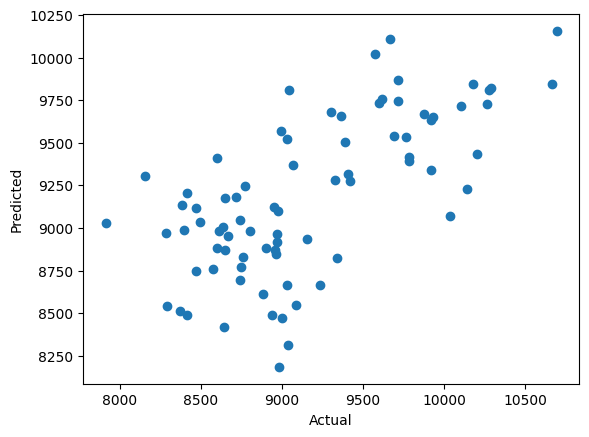

In [12]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [13]:
pred_y_dataset=pd.DataFrame({'Actual value':y_test,'Predicted value':y_pred, 'Difference':y_test-y_pred})
pred_y_dataset[0:20]

,Actual value,Predicted value,Difference
0,9032,8664.299634,367.700366
1,9577,10021.416574,-444.416574
2,9386,9503.510834,-117.510834
3,9765,9535.474301,229.525699
4,8573,8760.673765,-187.673765
5,10263,9730.249263,532.750737
6,9066,9367.991438,-301.991438
7,10287,9823.500265,463.499735
8,8469,9118.823636,-649.823636
9,8597,9412.289456,-815.289456
